In [1]:
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

In [5]:
first_image=x_train[0]

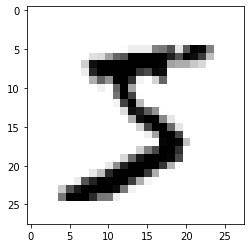

In [6]:
plt.imshow(first_image,cmap='gray_r')

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
first_image.max()

255

In [10]:
x_train=x_train/x_train.max()

In [11]:
x_test=x_test/x_test.max()

In [12]:
x_train[0].max()

1.0

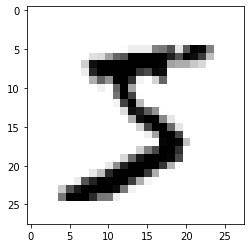

In [13]:
plt.imshow(x_train[0],cmap='gray_r')

In [14]:
x_train=x_train.reshape(60000,28,28,1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_test=x_test.reshape(10000,28,28,1)

In [18]:
x_test.shape

(10000, 28, 28, 1)

In [19]:
y_test.shape

(10000,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_trainset, X_testset, y_trainset, y_testset  = train_test_split(x_train, y_train, test_size=0.1, random_state=3)

In [22]:
X_trainset.shape

(54000, 28, 28, 1)

In [23]:
X_testset.shape

(6000, 28, 28, 1)

In [24]:
y_trainset.shape

(54000,)

In [25]:
y_testset.shape

(6000,)

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_cat_train=to_categorical(y_trainset,10)
y_cat_test= to_categorical(y_testset,10)

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [29]:
#base model
model=Sequential()

#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

#2D->1D
model.add(Flatten())

model.add(Dropout(0.5))

#Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dropout (Dropout)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [30]:
results = model.fit(X_trainset,y_cat_train,epochs=10, batch_size=32,validation_data=(X_testset,y_cat_test))

Epoch 1/10
1688/1688 [==============================] - 21s 6ms/step - loss: 0.1898 - accuracy: 0.9415 - val_loss: 0.0648 - val_accuracy: 0.9790
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0751 - accuracy: 0.9762 - val_loss: 0.0578 - val_accuracy: 0.9803
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.0420 - val_accuracy: 0.9848
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0367 - val_accuracy: 0.9877
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0371 - val_accuracy: 0.9878
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.0361 - val_acc

In [31]:
model.metrics_names

['loss', 'accuracy']

Text(0.5, 0, 'Epoch')

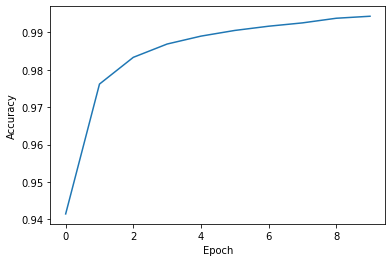

In [32]:
plt.plot(results.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

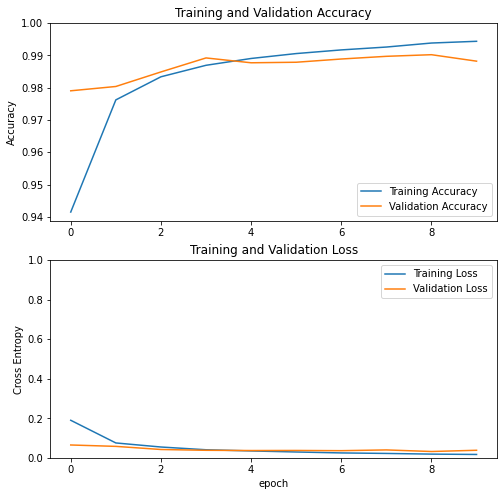

In [33]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [34]:
model.evaluate(X_testset,y_cat_test)

188/188 [==============================] - 1s 4ms/step - loss: 0.0381 - accuracy: 0.9882


[0.0380985364317894, 0.9881666898727417]

In [35]:
predictions=model.predict(x_test) 
preds_classes_x=np.argmax(predictions,axis=1)

In [36]:
preds_classes_x[0]

7

In [37]:
preds_classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix, without normalization
[[ 976    0    1    0    0    0    2    1    0    0]
 [   1 1128    2    0    0    2    1    0    0    1]
 [   1    0 1027    0    0    0    1    3    0    0]
 [   0    0    3 1003    0    2    0    1 

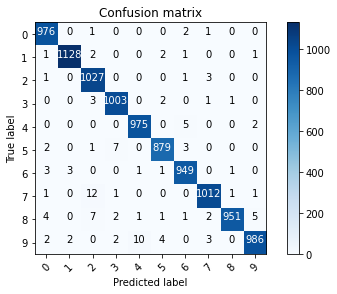

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, preds_classes_x)
#np.set_printoptions(precision=2)
print (classification_report(y_test, preds_classes_x))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4','5','6','7','8','9'],normalize= False,  title='Confusion matrix')

In [41]:
#base model
model_1=Sequential()

#convolutional layer
model_1.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(28, 28, 1), activation='relu',))
#pooling layer
model_1.add(MaxPool2D(pool_size=(2, 2)))

#convolutional layer
model_1.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(28, 28, 1), activation='relu',))
#pooling layer
model_1.add(MaxPool2D(pool_size=(2, 2)))

#convolutional layer
model_1.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
#pooling layer
model_1.add(MaxPool2D(pool_size=(2, 2)))

#2D->1D
model_1.add(Flatten())


#Dense layer
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='sigmoid'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)        

In [42]:
results_1 = model_1.fit(X_trainset,y_cat_train,epochs=10, batch_size=64,validation_data=(X_testset,y_cat_test))

Epoch 1/10
844/844 [==============================] - 9s 9ms/step - loss: 0.3500 - accuracy: 0.8925 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 2/10
844/844 [==============================] - 8s 9ms/step - loss: 0.1011 - accuracy: 0.9746 - val_loss: 0.0569 - val_accuracy: 0.9853
Epoch 3/10
844/844 [==============================] - 7s 9ms/step - loss: 0.0668 - accuracy: 0.9834 - val_loss: 0.0587 - val_accuracy: 0.9838
Epoch 4/10
844/844 [==============================] - 8s 9ms/step - loss: 0.0516 - accuracy: 0.9868 - val_loss: 0.0491 - val_accuracy: 0.9867
Epoch 5/10
844/844 [==============================] - 8s 9ms/step - loss: 0.0457 - accuracy: 0.9882 - val_loss: 0.0440 - val_accuracy: 0.9882
Epoch 6/10
844/844 [==============================] - 8s 9ms/step - loss: 0.0354 - accuracy: 0.9908 - val_loss: 0.0593 - val_accuracy: 0.9848
Epoch 7/10
844/844 [==============================] - 8s 9ms/step - loss: 0.0334 - accuracy: 0.9913 - val_loss: 0.0409 - val_accuracy: 0.9907
Epoch 

In [43]:
results_2 = model_1.fit(X_trainset,y_cat_train,epochs=10, batch_size=128,validation_data=(X_testset,y_cat_test))

Epoch 1/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0509 - val_accuracy: 0.9900
Epoch 2/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0734 - val_accuracy: 0.9892
Epoch 3/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0576 - val_accuracy: 0.9912
Epoch 4/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0599 - val_accuracy: 0.9898
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0600 - val_accuracy: 0.9907
Epoch 6/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0520 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 4s 11ms/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.0759 - val_accuracy: 0.9872

In [44]:
results_3 = model_1.fit(X_trainset,y_cat_train,epochs=10, batch_size=256,validation_data=(X_testset,y_cat_test))

Epoch 1/10
211/211 [==============================] - 3s 14ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0529 - val_accuracy: 0.9922
Epoch 2/10
211/211 [==============================] - 3s 13ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0718 - val_accuracy: 0.9918
Epoch 3/10
211/211 [==============================] - 3s 13ms/step - loss: 7.7196e-04 - accuracy: 0.9998 - val_loss: 0.0929 - val_accuracy: 0.9908
Epoch 4/10
211/211 [==============================] - 3s 13ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0846 - val_accuracy: 0.9900
Epoch 5/10
211/211 [==============================] - 3s 13ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.0650 - val_accuracy: 0.9908
Epoch 6/10
211/211 [==============================] - 3s 13ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0711 - val_accuracy: 0.9917
Epoch 7/10
211/211 [==============================] - 3s 13ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0784 - val_accuracy: 0.

Text(0.5, 0, 'Epoch')

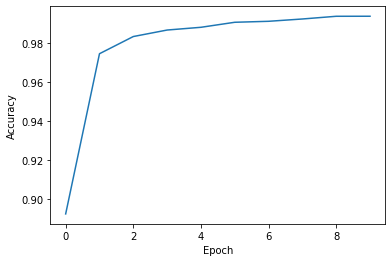

In [45]:
plt.plot(results_1.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

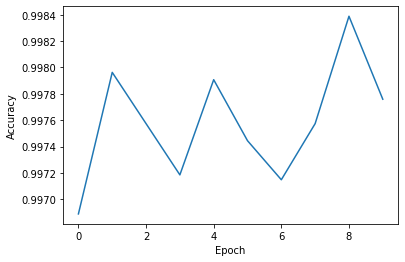

In [46]:
plt.plot(results_2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

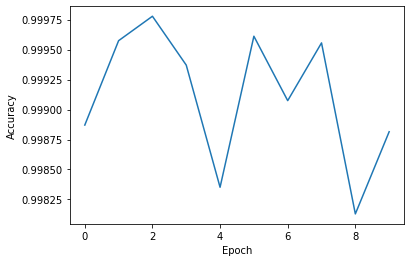

In [47]:
plt.plot(results_3.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [48]:
model_1.evaluate(X_testset,y_cat_test)

188/188 [==============================] - 1s 5ms/step - loss: 0.0623 - accuracy: 0.9920


[0.06227540597319603, 0.9919999837875366]

In [49]:
predictions_1=model_1.predict(x_test) 
preds_classes_x_1=np.argmax(predictions,axis=1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix, without normalization
[[ 976    0    1    0    0    0    2    1    0    0]
 [   1 1128    2    0    0    2    1    0    0    1]
 [   1    0 1027    0    0    0    1    3    0    0]
 [   0    0    3 1003    0    2    0    1 

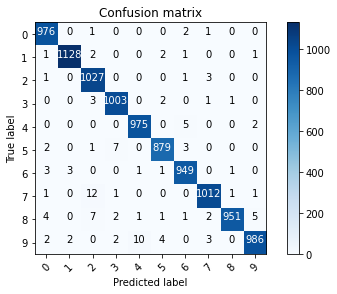

In [50]:
# Compute confusion matrix
cnf_matrix_1 = confusion_matrix(y_test, preds_classes_x_1)
#np.set_printoptions(precision=2)
print (classification_report(y_test, preds_classes_x))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4','5','6','7','8','9'],normalize= False,  title='Confusion matrix')